# Banknote Authentication 

##  Description
- The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

- It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 1,372 observations with 4 input variables and 1 output variable. The variable names are as follows:

- Variance of Wavelet Transformed image (continuous).
- Skewness of Wavelet Transformed image (continuous).
- Kurtosis of Wavelet Transformed image (continuous).
- Entropy of image (continuous).
- Class (0 for authentic, 1 for inauthentic).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv("bank.csv")
df.head()


,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.shape

(1372, 5)

<AxesSubplot:xlabel='Variance', ylabel='Skewness'>

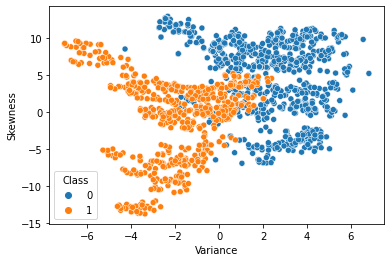

In [4]:
sns.scatterplot(x="Variance",y="Skewness",hue="Class",data=df)

<AxesSubplot:xlabel='Variance', ylabel='Kurtosis'>

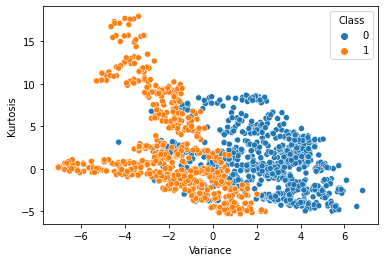

In [5]:
sns.scatterplot(x="Variance",y="Kurtosis",hue="Class",data=df)

<AxesSubplot:xlabel='Variance', ylabel='Entropy'>

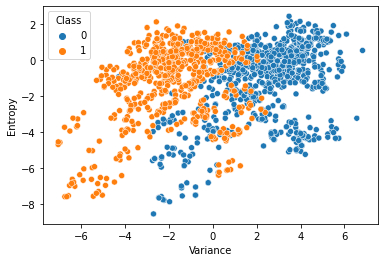

In [6]:
sns.scatterplot(x="Variance",y="Entropy",hue="Class",data=df)

## Observations from the visualization
- We can see Variance is the most important feature as it helps to distinguish easily regarding the aunthenticity 
- Generally images of notes with negative Variance is aunthenticity
- If a image is having negative skewness and negative Variance it is authentic this pair can be used when other parameters are not available
- Kurtosis and Entropy shows a mixed behaviour but it gives proper prediction when we have Variance otherwise it is hard to predict is aunthenticity

In [7]:
y=df.Class
df.drop("Class",axis=1,inplace=True)
X=df

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=31)
print("Train Test Set splitting complete")

Train Test Set splitting complete


In [9]:
X_train

,Variance,Skewness,Kurtosis,Entropy
785,-1.66620,-0.30005,1.42380,0.024986
1242,-3.60530,-5.97400,10.09160,-0.828460
929,-3.91720,2.66520,0.78886,-0.781900
851,0.60731,3.95440,-4.77200,-4.485300
1094,2.01770,1.79820,-2.95810,0.209900
...,...,...,...,...
826,-4.21100,-12.47360,14.97040,-1.388400
610,-0.23610,9.32210,2.13070,-4.379300
894,-1.83910,-9.08830,9.24160,-0.104320
16,2.67190,3.06460,0.37158,0.586190


# Model Training

In [10]:
from sklearn.metrics import accuracy_score

## 1) KNN Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model0= KNeighborsClassifier(n_neighbors=2,algorithm='ball_tree')
model0.fit(X_train,y_train)
y_pred=model0.predict(X_test)
print("Model 0 training Complete")

Model 0 training Complete


In [12]:
acc0=accuracy_score(y_pred,y_test)
print("Accuracy: ",acc0*100,"%")

Accuracy:  100.0 %


## 2) RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=150)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
print("Model 1 training Complete")

Model 1 training Complete


In [14]:
acc1 = accuracy_score(y_pred1,y_test)
print("Accuracy: ",acc1*100,"%")

Accuracy:  98.9090909090909 %


## 3) Logistic Regression 

In [15]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print("Model 2 training Complete")

Model 2 training Complete


In [16]:
acc2=accuracy_score(y_pred2,y_test)
print("Accuracy: ",acc2*100,"%")

Accuracy:  98.54545454545455 %
